<a href="https://colab.research.google.com/github/Anuchand5305/Payroll-Management-Py/blob/main/customer_shopping_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.shape #(rows,columns)

(99457, 10)

In [ ]:
df.describe() #describing the dataset

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
df.dtypes #check the datatype of each of the variable which are present in our dataset

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [ ]:
df.isnull().sum() #to check if our dataset have any null values

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df.drop(["customer_id"],axis=1,inplace=True) #axis=1 because we need drop a column

In [ ]:
df.head()

,invoice_no,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
# Analysis and Visulaization of data

<ipython-input-30-61ea3e0d68e8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-30-61ea3e0d68e8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-30-61ea3e0d68e8>:7: UserWarning: 

`distplot` is a deprecated function and will b

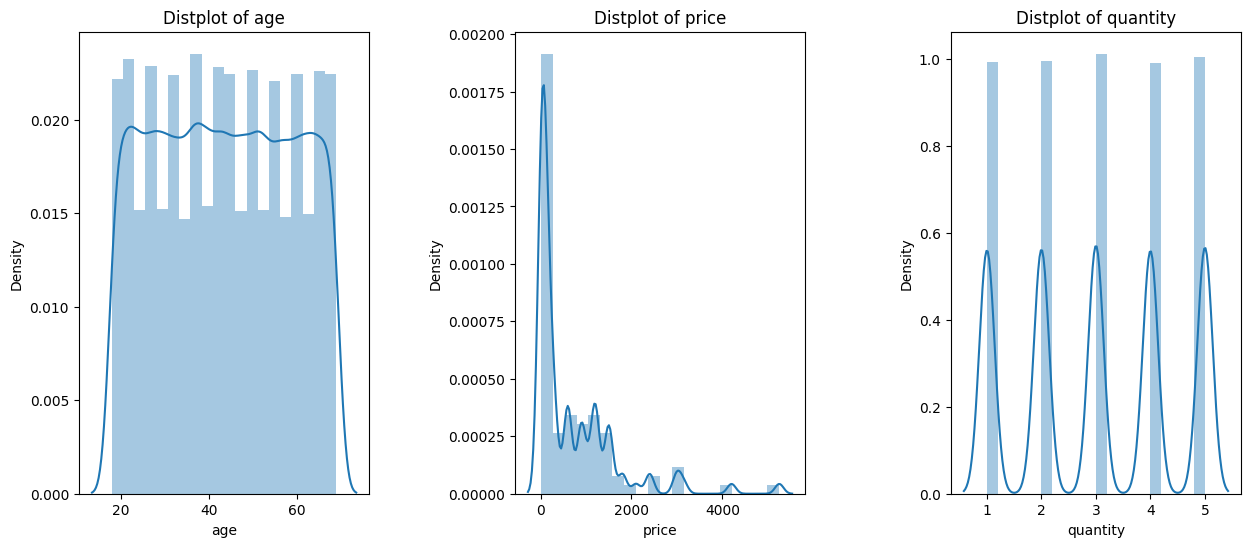

In [30]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['age' , 'price' , 'quantity']:
  n +=1
  plt.subplot(1 , 3 , n)
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
  sns.distplot(df[x] , bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

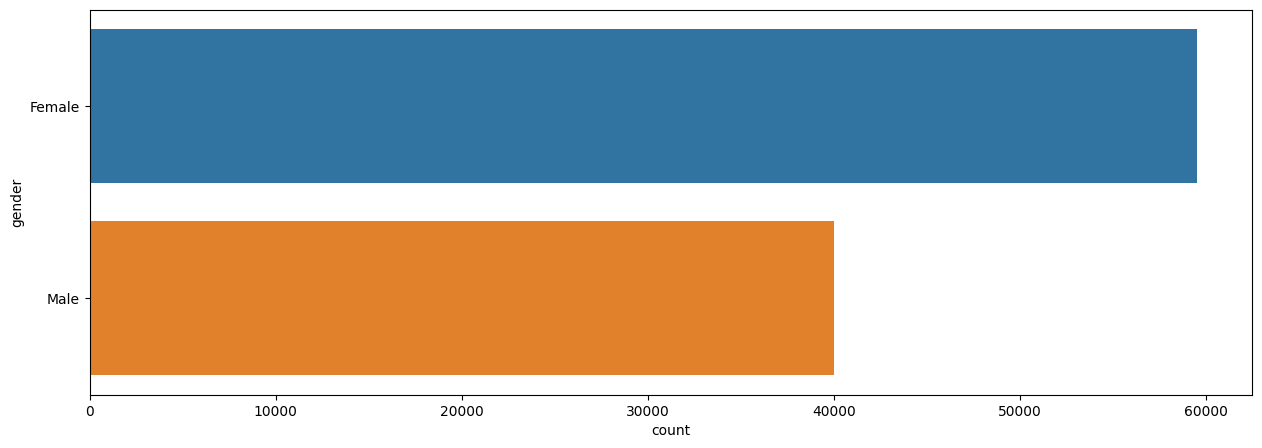

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(y='gender',data=df)
plt.show()

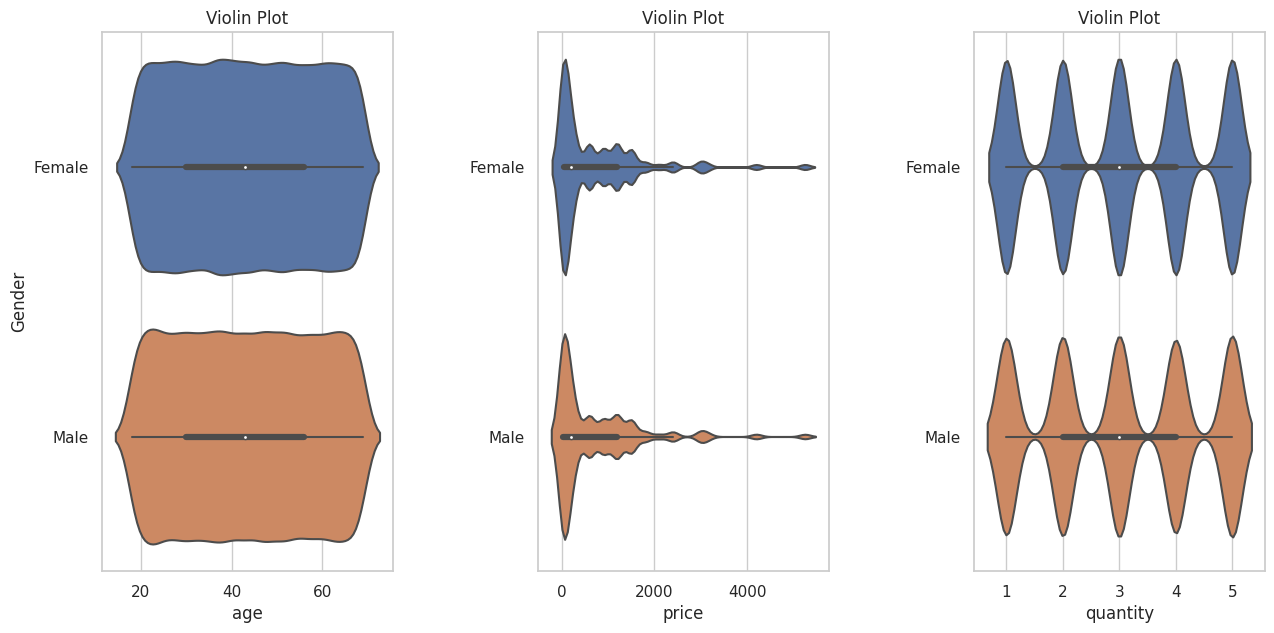

In [37]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['age' , 'price' , 'quantity']:
  n +=1
  plt.subplot(1 , 3 , n)
  sns.set(style='whitegrid')
  plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
  sns.violinplot(x = cols , y = 'gender' , data = df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title("Violin Plot")
plt.show()

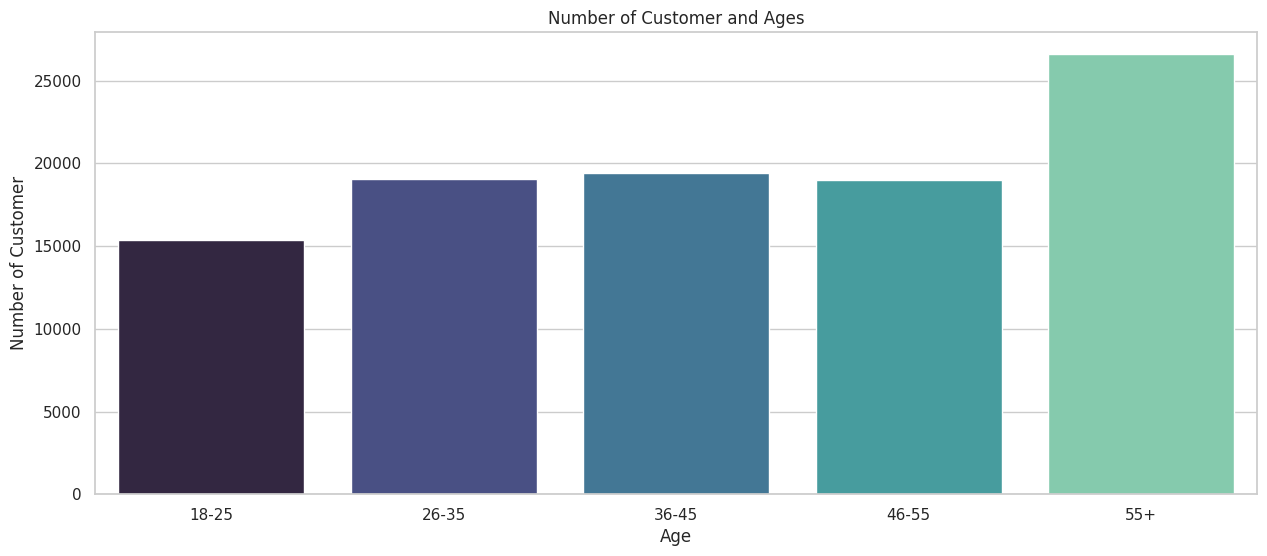

In [38]:
age_18_25 = df.age[(df.age >= 18) & (df.age <= 25)]
age_26_35 = df.age[(df.age >= 26) & (df.age <= 35)]
age_36_45 = df.age[(df.age >= 36) & (df.age <= 45)]
age_46_55 = df.age[(df.age >= 46) & (df.age <= 55)]
age_55above = df.age[df.age >=56]
agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

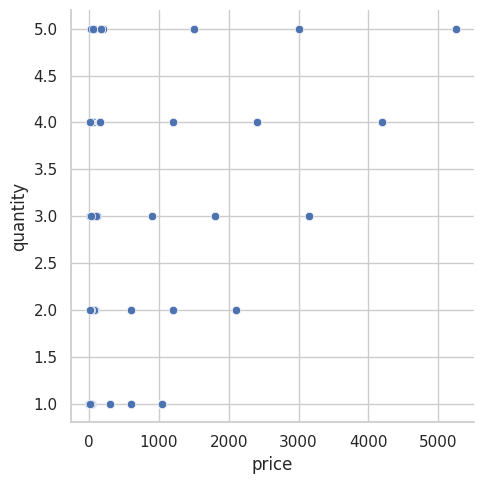

In [39]:
sns.relplot(x="price",y="quantity",data=df)

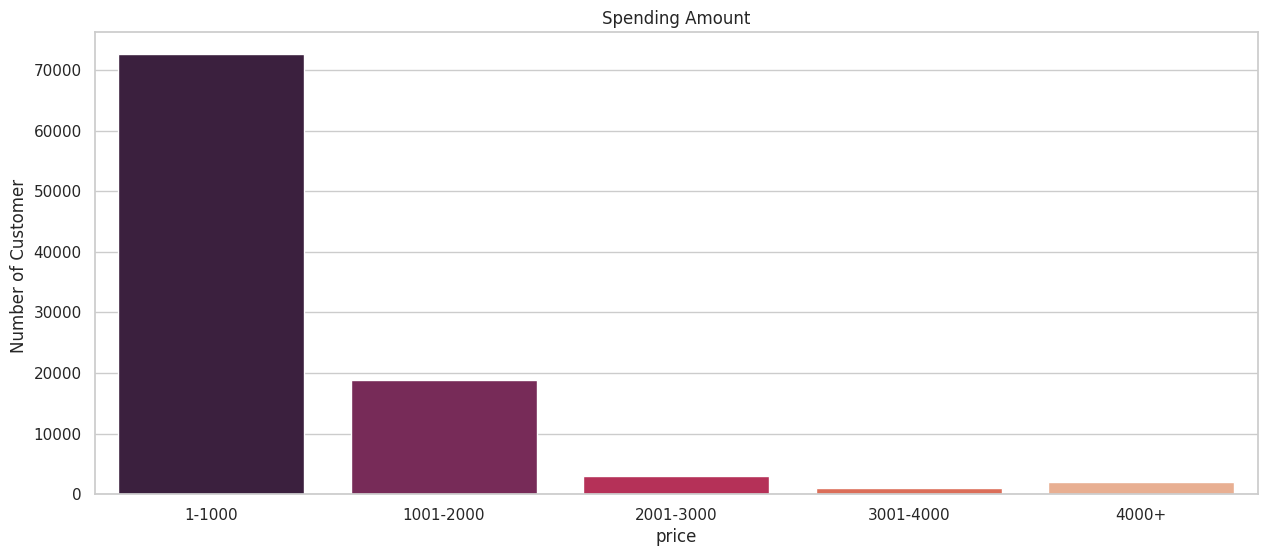

In [41]:
pp_1_1000 = df["price"][(df["price"] >=1) & (df["price"]<=1000)]
pp_1001_2000 = df["price"][(df["price"] >=1001) & (df["price"]<=2000)]
pp_2001_3000 = df["price"][(df["price"] >=2001) & (df["price"]<=3000)]
pp_3001_4000 = df["price"][(df["price"] >=3001) & (df["price"]<=4000)]
pp_4001_6000 = df["price"][(df["price"] >=4001) & (df["price"]<=6000)]
ssx=["1-1000" , "1001-2000" , "2001-3000" , "3001-4000" , "4000+"]
ssy=[len(pp_1_1000.values),len(pp_1001_2000.values),len(pp_2001_3000.values),len(pp_3001_4000.values),len(pp_4001_6000.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="rocket")
plt.title("Spending Amount")
plt.xlabel("price")
plt.ylabel("Number of Customer ")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

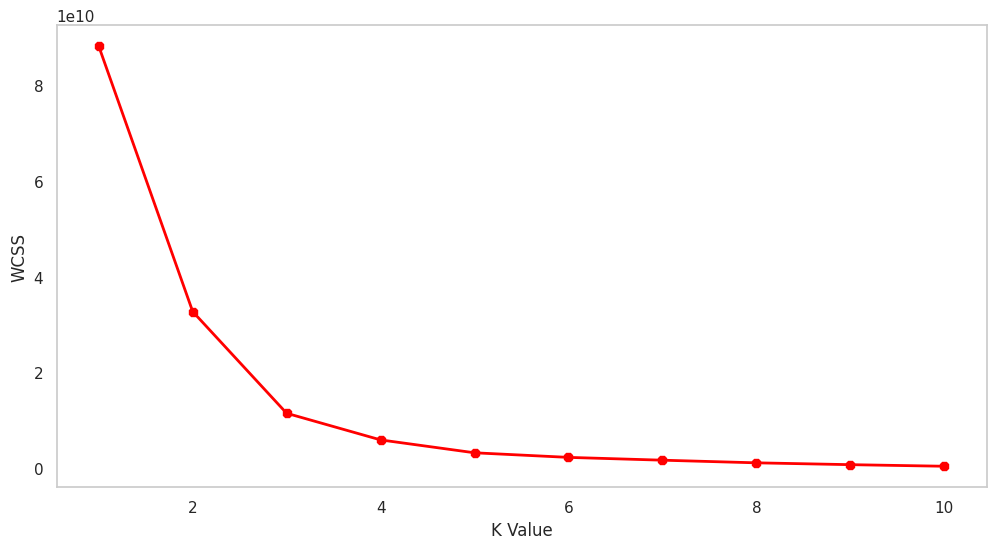

In [42]:
X1=df.loc[:, ["age","price"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red" , marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [57]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X1)
print(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 0 ... 0 2 0]


In [58]:
print(kmeans.cluster_centers_)

[[  43.40784164  166.86690735]
 [  43.48327422 1353.14940956]
 [  43.35708599 3717.85649881]]


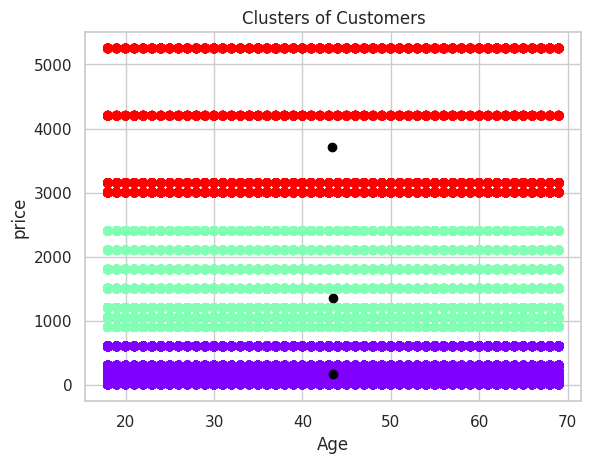

In [59]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],color='black')
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("price")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

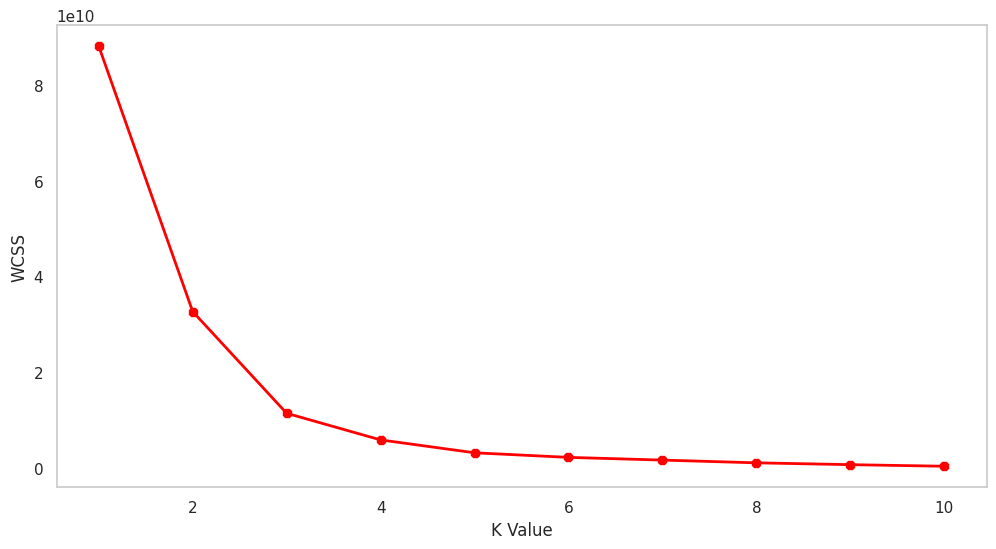

In [56]:
X2=df.loc[:, ["quantity","price"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red" , marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [62]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X1)
print(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 0 ... 0 2 0]


In [63]:
print(kmeans.cluster_centers_)

[[  43.40784164  166.86690735]
 [  43.48327422 1353.14940956]
 [  43.35708599 3717.85649881]]


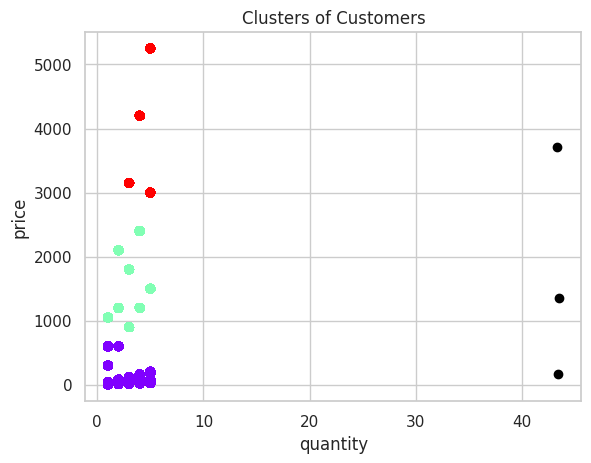

In [64]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],color='black')
plt.title("Clusters of Customers")
plt.xlabel("quantity")
plt.ylabel("price")
plt.show()